<a href="https://colab.research.google.com/github/glyzinieh/find-PI/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

%cd /content
!git clone https://github.com/glyzinieh/find-PI.git
%cd find-PI

!pip install gmpy2 matplotlib-fontja mpmath tqdm

!mkdir data
!mkdir data/result
!mkdir data/plot

/content
Cloning into 'find-PI'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 247 (delta 95), reused 191 (delta 60), pack-reused 0 (from 0)
Receiving objects: 100% (247/247), 1.64 MiB | 1.44 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/find-PI
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 6.3 MB/s eta 0:00:00


In [2]:
from FindPI import conditions
from FindPI.evaluate import Comparer

DIGITS = 4
THRESHOLD = 10 ** -5
TIMES = 10

# CONDITION = conditions.Distance(threshold=THRESHOLD)
CONDITION = conditions.DigitsAndDistance(digits=DIGITS, threshold=THRESHOLD)
# CONDITION = conditions.Times(times=TIMES)

findPI = Comparer(CONDITION)

In [3]:
import math
import random

from mpmath import factorial, mp, mpf, sqrt

from FindPI.math_funcs import cos, sin, tan

mp.dps = 100


@findPI.func("内接多角形", {"n": 3})
def incribed(n):
    value = mpf(n) / mpf(2) * sqrt(2 - 2 * cos(360 / n))
    n += 1
    return value, {"n": n}


@findPI.func("外接多角形", {"n": 3})
def outcribed(n):
    value = n * tan(180 / n)
    n += 1
    return value, {"n": n}


@findPI.func("モンテカルロ法", {"n": 0, "in_circle": 0})
def montecarlo(n, in_circle):
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1:
        in_circle += 1
    n += 1
    value = 4 * mpf(in_circle) / mpf(n)
    return value, {"n": n, "in_circle": in_circle}


@findPI.func("ライプニッツ級数", {"n": 0, "s": 0})
def leibniz(n, s):
    s += mpf((-1) ** n) / mpf(2 * n + 1)
    value = s * 4
    n += 1
    return value, {"n": n, "s": s}


@findPI.func("チュドノフスキーの公式", {"n": 0, "s": 0})
def chudnovsky(n, s):
    A = mpf(545140134)
    B = mpf(13591409)
    C = mpf(640320)
    s += (mpf(-1)**n) * factorial(6 * n) * (A * n + B) / (factorial(3 * n) * (factorial(n) ** 3) * (C ** (3 * (n + 1 / 2))))
    value = 1 / (12 * s)
    n += 1
    return value, {"n": n, "s": s}


@findPI.func("区分求積法", {"n": 1})
def quadrature(n):
    s = 0
    dx = mpf(1) / mpf(n)
    x = mpf(1) / mpf(n) / mpf(2)
    for _ in range(n):
        y = sqrt(1 - x**2)
        s += dx * y
        x += dx
    value = s * 4
    n += 1
    return value, {"n": n}


@findPI.func("二分法", {"x_1": 0, "x_2": 3})
def dichotomy(x_1, x_2):
    wj = mpf(x_1 + x_2) / mpf(2)
    if math.tan(wj) < 1:
        x_1 = wj
    else:
        x_2 = wj
    value = wj * 4
    return value, {"x_1": x_1, "x_2": x_2}

In [4]:
findPI.run()
findPI.save("data/result")

100%|██████████| 7/7 [00:23<00:00,  3.39s/it]


In [5]:
import os

from FindPI.evaluate import ResultContainer2 as RC2

PATH = "data/result"


results = [
    RC2.load(os.path.join(PATH, "内接多角形.pkl2")),
    RC2.load(os.path.join(PATH, "外接多角形.pkl2")),
    RC2.load(os.path.join(PATH, "モンテカルロ法.pkl2")),
    RC2.load(os.path.join(PATH, "ライプニッツ級数.pkl2")),
    RC2.load(os.path.join(PATH, "チュドノフスキーの公式.pkl2")),
    RC2.load(os.path.join(PATH, "区分求積法.pkl2")),
    RC2.load(os.path.join(PATH, "二分法.pkl2")),
]

In [6]:
import mpmath

from FindPI.evaluate import Axis, HLine, PlotSettings, Plotter

mpmath.mp.dps = 100

plot_settings = PlotSettings(
    x_axis=Axis("time", "time"),
    y_axis=Axis("digit", "digit"),
    # hline=HLine(mpmath.pi(), "π"),
    # marker=True
)

for result in results:
    result.set_target(mpmath.pi())

plotter = Plotter(
    plot_settings=plot_settings,
    results=results
)

7it [00:08,  1.23s/it]


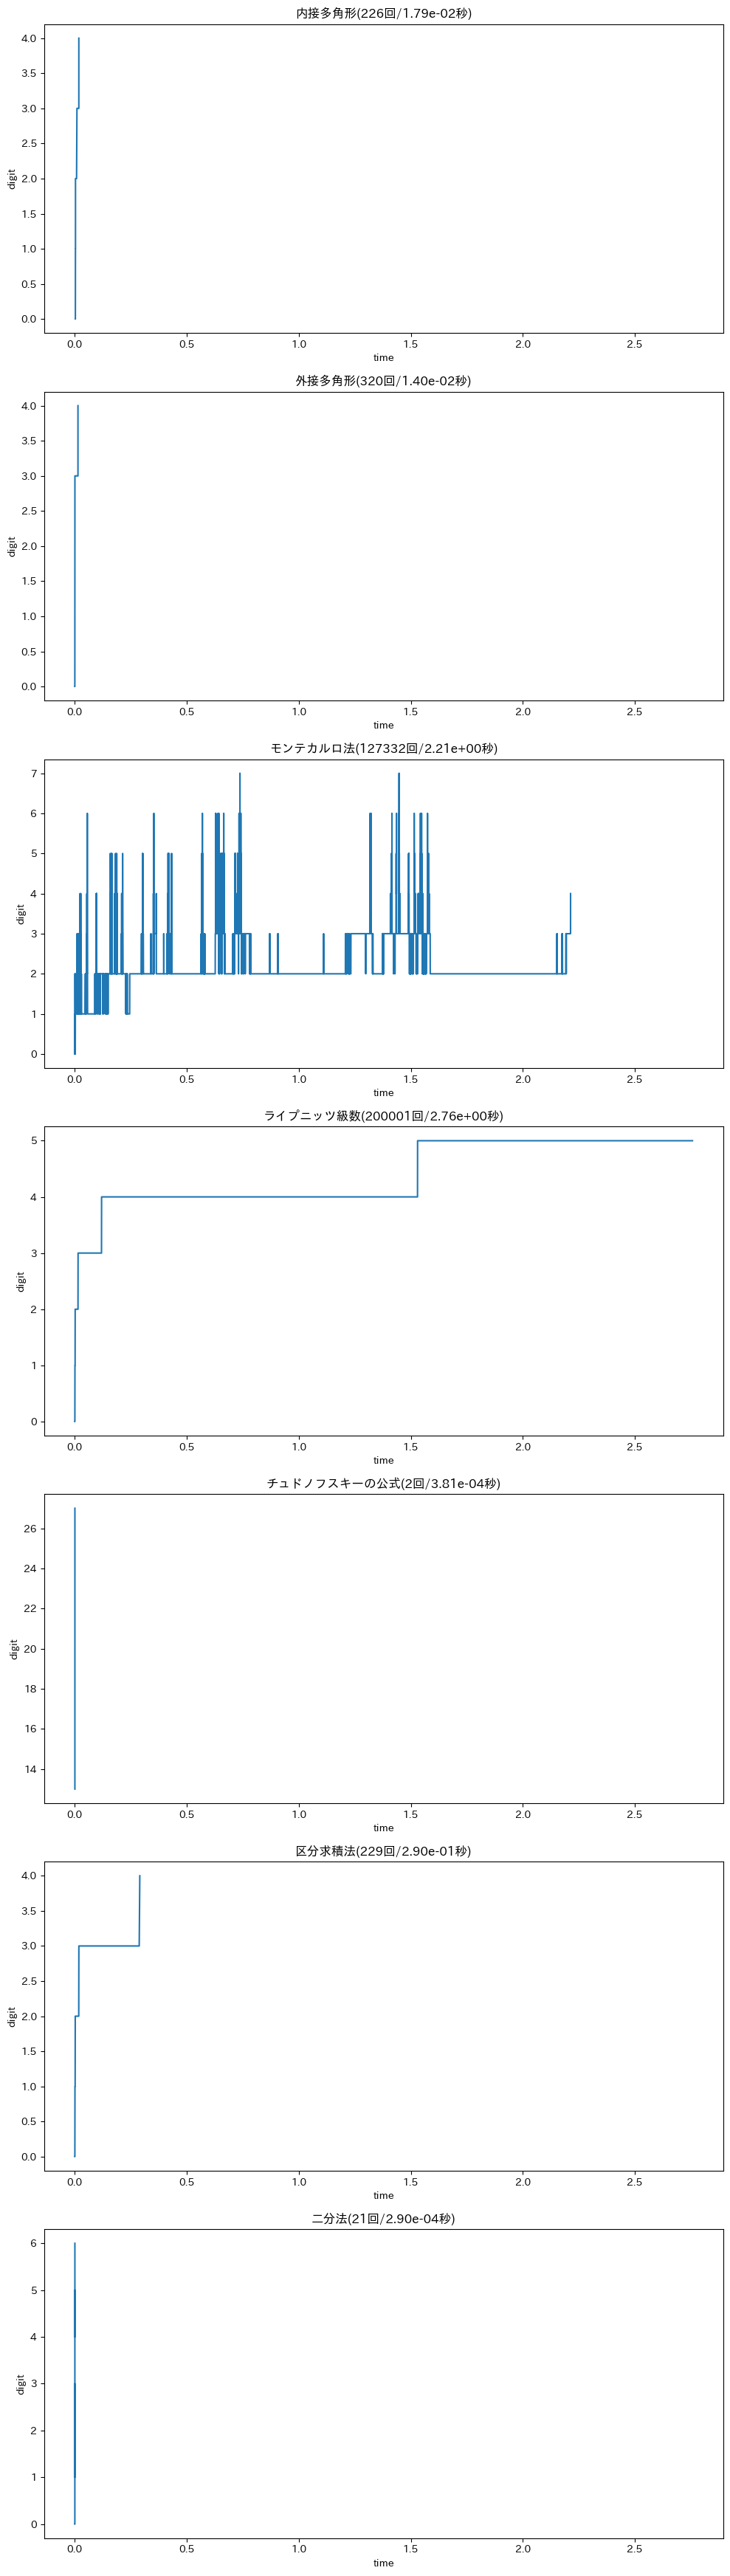

In [7]:
plotter.plot()
plotter.save("data/plot")